In [1]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize the pixel values to be in [0, 1]

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Create model
model = tf.keras.Sequential()
#model.add(tf.keras.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Fit the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2653 - accuracy: 0.9010
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2536 - accuracy: 0.9054
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2405 - accuracy: 0.9104
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2327 - accuracy: 0.9126
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2211 - accuracy: 0.9161


In [8]:
# calculate predictions
predictions = model.predict(x_test)
# print(predictions)

313/313 [==============================] - 1s 4ms/step


In [9]:
# round predictions
y_test_hat = [list(x).index(max(x)) for x in predictions]
num_correct = 0
for i in range(len(y_test)):
    if y_test_hat[i]==y_test[i]:
        num_correct +=1

Accuracy_rate = num_correct/len(y_test)
print("Accuracy Rate = ", Accuracy_rate)

Accuracy Rate =  0.883


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_hat, labels=range(10))

array([[847,   0,  23,  17,   5,   2,  99,   0,   7,   0],
       [  2, 978,   2,  13,   3,   0,   2,   0,   0,   0],
       [ 11,   0, 784,   6, 120,   0,  77,   0,   2,   0],
       [ 20,  14,  18, 863,  46,   0,  35,   0,   4,   0],
       [  0,   0,  83,  22, 830,   0,  65,   0,   0,   0],
       [  0,   0,   0,   0,   0, 961,   0,  17,   1,  21],
       [126,   1, 100,  17,  67,   0, 678,   0,  11,   0],
       [  0,   0,   0,   0,   0,  20,   0, 959,   0,  21],
       [  3,   0,   5,   2,   8,   1,   2,   4, 975,   0],
       [  0,   0,   0,   0,   0,   6,   1,  38,   0, 955]])

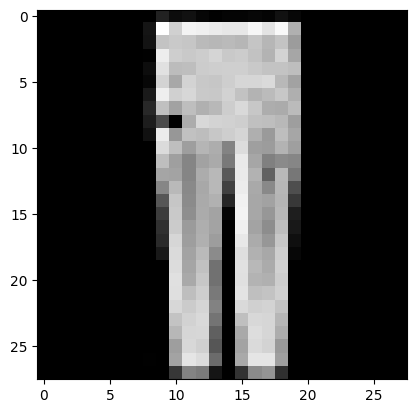

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_test[200, :, :], cmap='gray', vmin=0, vmax=1)
plt.show()